## Compare two parametrisations of the Naghavi model

[The 2024 Naghavi et al article](https://pubmed.ncbi.nlm.nih.gov/39442244/) discusses the effects of Dobutamine which is a medication that treats heart failure by strengthening the heart muscle. They observe a change in parameter `E_es` - the end-systolic elastance of the left ventricle.

In this notebook, we can tweak the `E_act` parameter of the left ventricle in the Naghavi model instantiated in ModularCirc, which is related to `E_es`. We will observe a change in the resulting pressure-volume loop. 

In [24]:
from ModularCirc.Models.NaghaviModelParameters import NaghaviModelParameters
from ModularCirc.Models.NaghaviModel import NaghaviModel
from ModularCirc.Solver import Solver
from ModularCirc.Analysis.BaseAnalysis import BaseAnalysis
import matplotlib.pyplot as plt

TIME_SETUP_DICT = {
        'name'       :  'TimeTest', # the name asssociated with the temporal discretization (not super important.. names internal variable)
        'ncycles'    :  30,         # the maximum number of cycles for which we run the simulation
        'tcycle'     :  1000.,      # the duration of a heart beat (here in ms)
        'dt'         :  1.0,        # the duration of a discrete time step
        'export_min' :  2           # number of time steps for which we export the simulation (can also be used as a way to impose a minimum number of pulses)
    }

Set up two parameter objects, with differing `E_act` values for the left ventricle.

In [25]:
po_1 = NaghaviModelParameters()

po_1.set_chamber_comp('lv', E_act=5)

po_1['lv']['E_act']

5

In [26]:
po_2 = NaghaviModelParameters()

po_2.set_chamber_comp('lv', E_act=1)

po_2['lv']['E_act']

1

Instantiate two models, passing the corresponding parameter objects.

In [27]:
model_1 = NaghaviModel(
    time_setup_dict=TIME_SETUP_DICT,
    suppress_printing=True,
    parobj=po_1,
    )

model_2 = NaghaviModel(
    time_setup_dict=TIME_SETUP_DICT,
    suppress_printing=True,
    parobj=po_2,
    )

In [28]:
solver_1 = Solver(model=model_1)

solver_1.setup(
    optimize_secondary_sv=False,
    suppress_output=True,
    step_tol=0.001,
    conv_cols=['p_lv', 'v_lv'],
    method='LSODA'                       # 'LSODA' 'BDF
)

solver_1.solve()
print(solver_1.converged)
print(solver_1.Nconv)

True
5


In [29]:
solver_2 = Solver(model=model_2)

solver_2.setup(
    optimize_secondary_sv=False,
    suppress_output=True,
    step_tol=0.001,
    conv_cols=['p_lv', 'v_lv'],
    method='LSODA'                       # 'LSODA' 'BDF
)

solver_2.solve()
print(solver_2.converged)
print(solver_2.Nconv)

True
11


In [30]:
model_1.components['lv'].V

0       104.000000
1       108.906653
2       112.456088
3       115.007686
4       116.788715
           ...    
5996     99.809330
5997     99.850974
5998     99.887884
5999     99.920118
6000     99.947741
Name: v_lv, Length: 6001, dtype: float64

In [31]:
model_2.components['lv'].V

0        104.000000
1        108.909945
2        112.481850
3        115.092297
4        116.983035
            ...    
11996    102.896546
11997    102.939993
11998    102.978843
11999    103.013134
12000    103.042913
Name: v_lv, Length: 12001, dtype: float64

### Inspect outputs graphically using the BaseAnalysis module

In [32]:
ba_1 = BaseAnalysis(model_1)
ba_2 = BaseAnalysis(model_2)

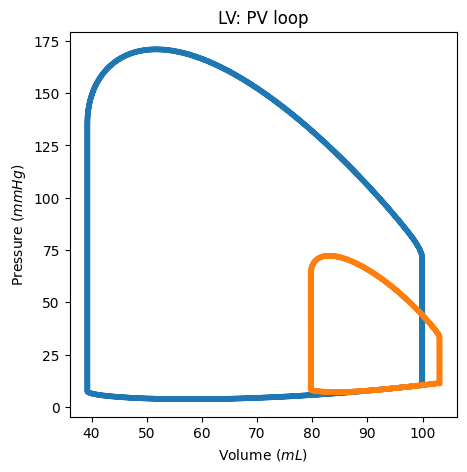

In [33]:
ax_1 = ba_1.plot_p_v_loop('lv')
ax_2 = ba_2.plot_p_v_loop(component='lv', ax=ax_1)
plt.show()

We can observe that with a smaller `E_act` parameter for the left ventricle, the system stabilises at a different range of the pressure-volume loop. In reality, biology is dynamic so the cardiovascular system parameters will adjust to each other. So, a change in left-ventricle strength might trigger a change in resistance or capacitance of other components. Such interactions are not yet part of the models instantiated in `ModularCirc`.

In [ ]:
print(ba_1.compute_cardiac_output('lv'))

print(ba_1.compute_artery_pressure_range('ao'))

3.642888295375965
(np.float64(70.6929909314813), np.float64(168.6123925024007))


In [35]:
print(ba_2.compute_cardiac_output('lv'))

print(ba_2.compute_artery_pressure_range('ao'))

1.3995489824055556
(np.float64(33.01671614474511), np.float64(71.34189308538005))


### Other exercises

Try modifying different parameters, for example resistance of the aorta, and observe changes in the P-V loop or the cardiac output.